# Figures of theory-kernel-analysis project

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Figure 2

(-0.5, 33.5, 5.5, -0.5)

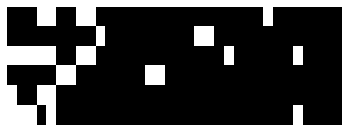

In [14]:
df = pd.read_csv('../data/Cordaro2008ref.tsv', sep='\t', index_col=0)
plt.imshow(df, cmap='gray', aspect=2)
plt.axis('off')

(-0.5, 33.5, 2.5, -0.5)

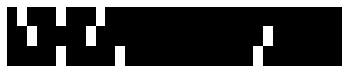

In [15]:
s = np.zeros((3, df.shape[1]))
s[0, [1, 5, 9]] = 1
s[1, [2, 8, 26]] = 1
s[2, [5, 11, 25]] = 1

plt.imshow(s, cmap='gray', aspect=2)
plt.axis('off')

(0.6, 1.1)

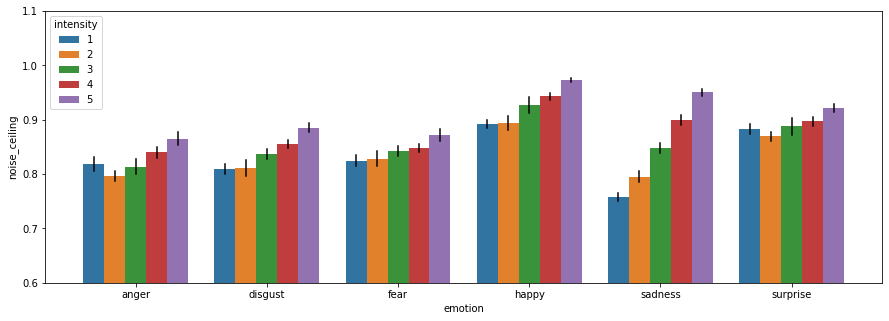

In [16]:
nc = pd.read_csv('../results/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity != 0")
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x='emotion', y='noise_ceiling', hue='intensity', data=nc, ax=ax)
idx = 0
for i, container in enumerate(ax.containers):
    for ii, bar in enumerate(container.get_children()):
        mid = bar.xy[0] + bar.get_width() / 2
        sd = nc.sort_values(['intensity']).iloc[idx, -1]
        ax.plot([mid, mid], [bar.get_height()-sd*2, bar.get_height()+sd*2], c='k')
        idx += 1
        
ax.set_ylim(0.6, 1.1)

## Figure 3

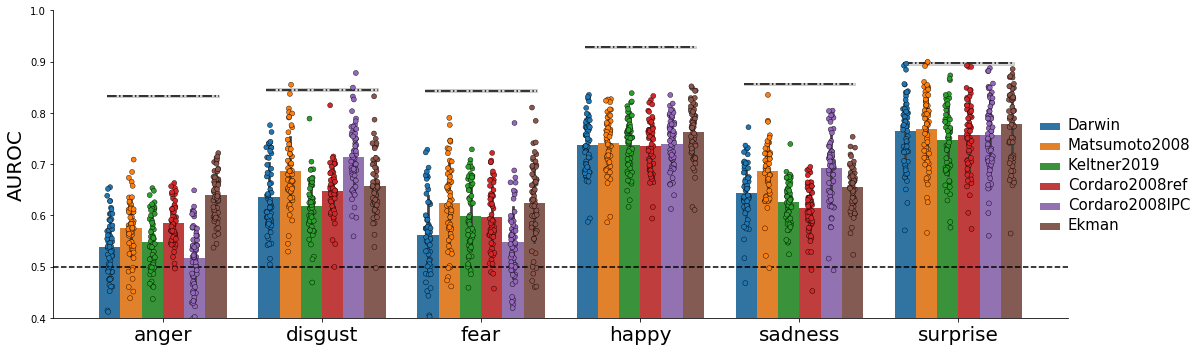

In [19]:
ymin = 0.4
ymax = 1
chance_level = .5

df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
nc = pd.read_csv('../results/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity == 0")

g = sns.catplot(x='emotion', y='score', data=df, hue='mapping',
                kind="bar", aspect=3, height=5, ci='sd')
g._legend.set_title('')
plt.setp(g._legend.get_texts(), fontsize=15)

ax = sns.stripplot(x='emotion', y='score', hue='mapping',
              edgecolor='black', linewidth=0.4, data=df,
              dodge=True, jitter=True)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

n_tk = df['mapping'].unique().size
for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]] * 6)
    this_sd = np.array([nc['sd'].iloc[i]] * 6)
    plt.plot(np.linspace(i-0.35, i+0.35, num=6), this_nc, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--')
ax.legend_.remove()
plt.savefig('Figure4.png')

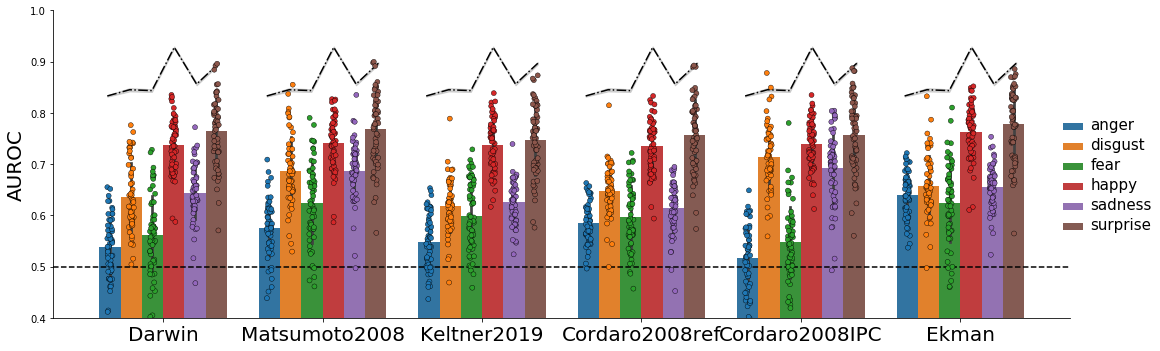

In [20]:
ymin = 0.4
ymax = 1
chance_level = .5

df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
nc = pd.read_csv('../results/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity == 0")

g = sns.catplot(x='mapping', y='score', data=df, hue='emotion',
                kind="bar", aspect=3, height=5, ci='sd')
g._legend.set_title('')
plt.setp(g._legend.get_texts(), fontsize=15)

ax = sns.stripplot(x='mapping', y='score', hue='emotion',
              edgecolor='black', linewidth=0.4, data=df,
              dodge=True, jitter=True)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

n_emo = df['emotion'].unique().size
for i in range(n_tk):
    this_nc = nc['noise_ceiling']
    this_sd = nc['sd']
    plt.plot(np.linspace(i-0.35, i+0.35, num=6), this_nc, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--')
ax.legend_.remove()
plt.savefig('Figure4b.png')

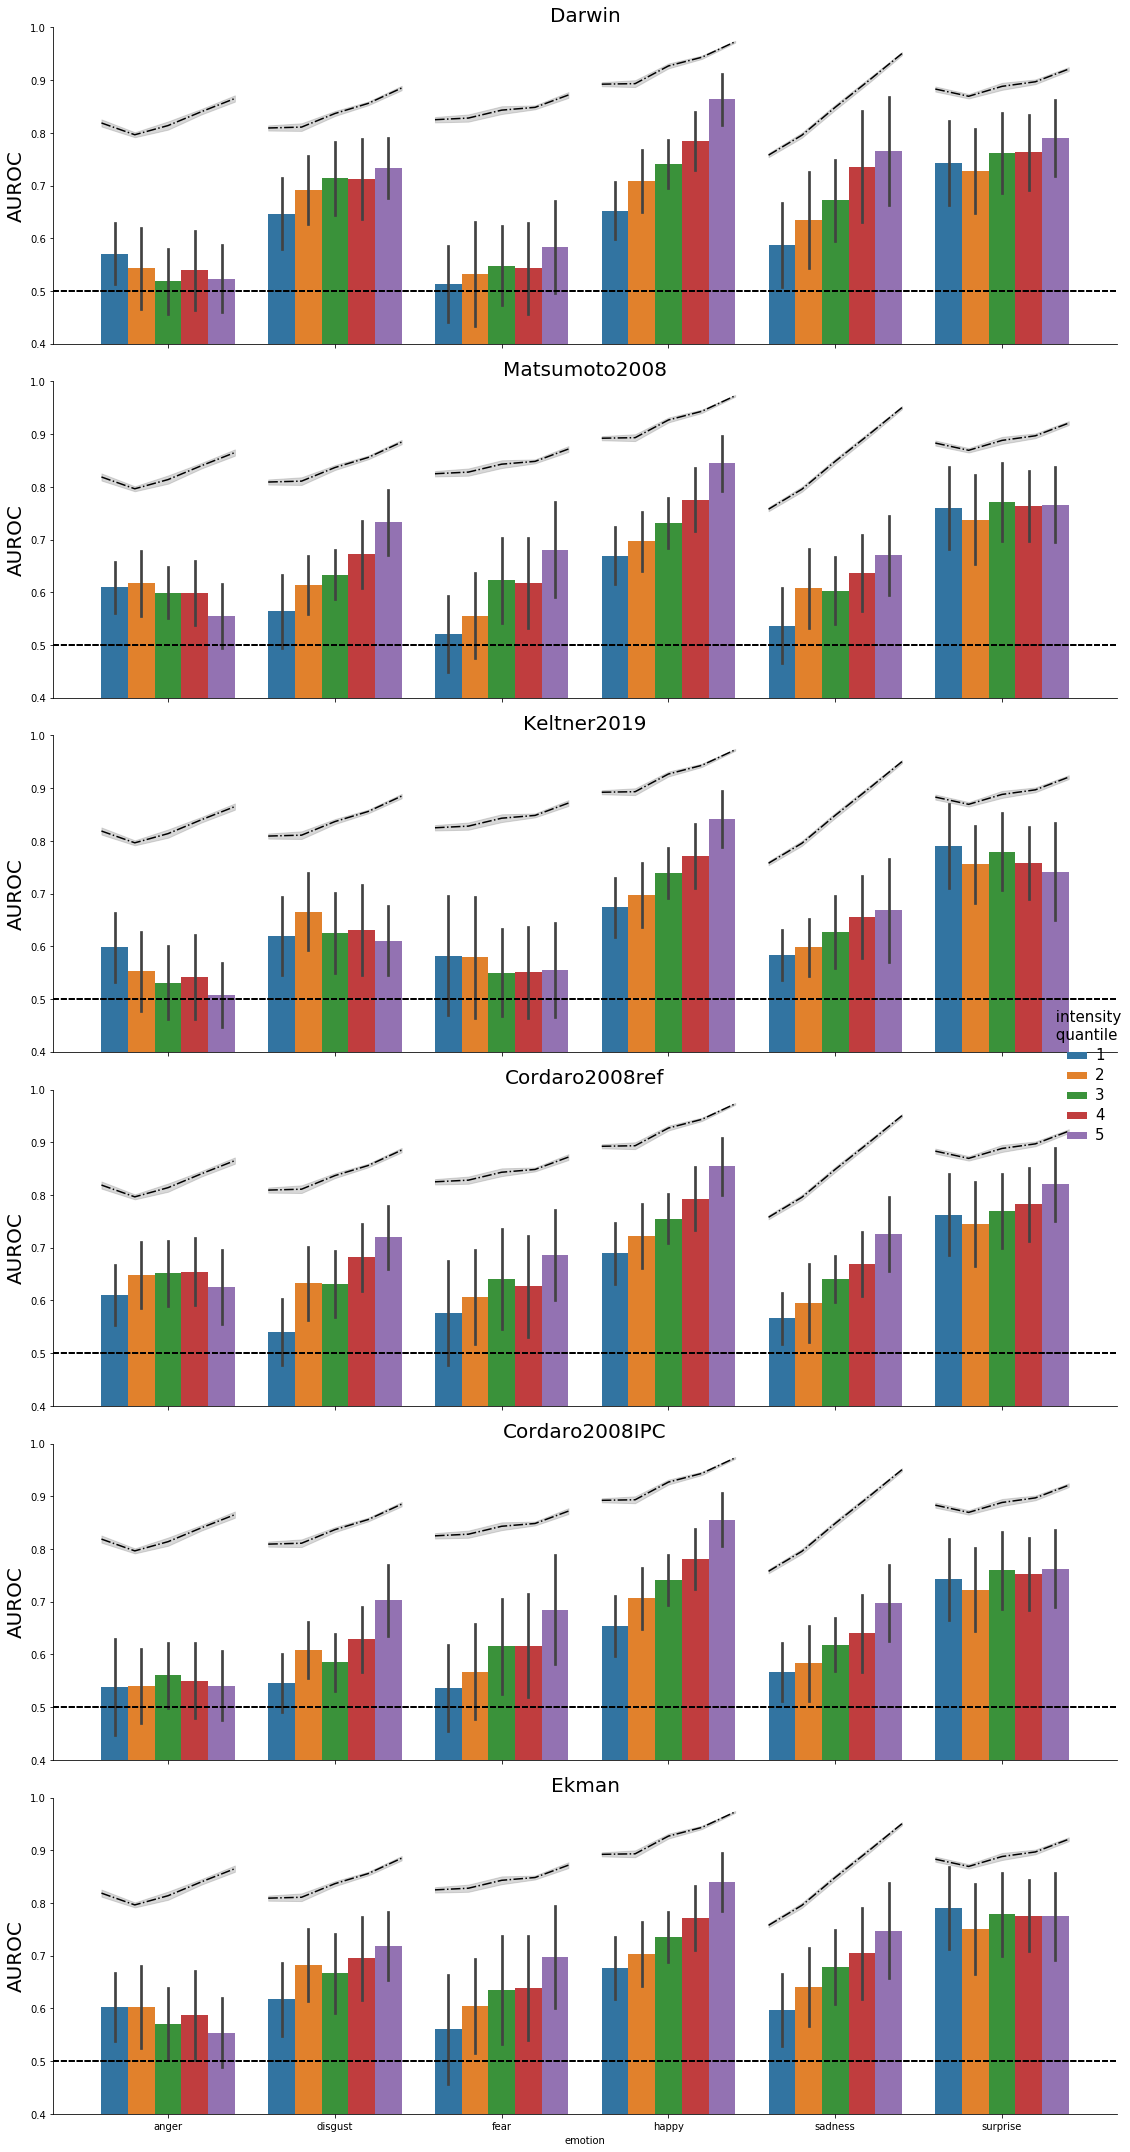

In [22]:
nc = pd.read_csv('../results/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity != 0")

df_int = pd.read_csv('../results/score_per_intensity_quantile.tsv', sep='\t', index_col=0)
g = sns.catplot(x='emotion', y='score', data=df_int, hue='intensity', row='mapping',
                kind="bar", aspect=3, height=5, ci='sd')

g._legend.set_title(' intensity\n quantile')
plt.setp(g._legend.get_title(), fontsize=15)
plt.setp(g._legend.get_texts(), fontsize=15)
for i, ax in enumerate(g.axes.flatten()):
    ax.set_title(df['mapping'].unique()[i], fontsize=20)
    for ii, emo in enumerate(nc['emotion'].unique()):
        this_nc = nc.loc[nc['emotion'] == emo, 'noise_ceiling']
        this_sd = nc.loc[nc['emotion'] == emo, 'sd']
        ax.plot(np.linspace(ii-0.4, ii+0.4, num=5), this_nc, c='k', ls='-.')
        ax.fill_between(
            np.linspace(ii-0.4, ii+0.4, num=5),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )
        ax.set_ylim(ymin, ymax)
        ax.axhline(0.5, ls='--', c='k')
        ax.set_ylabel("AUROC", fontsize=20)

plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout()
#fig.savefig('Figure7.png')
#plt.close()

In [23]:
subs = [f'sub-{str(i+1).zfill(2)}' for i in range(60)]
dfs = []
for sub in subs:
    df = pd.read_csv(f'../data/ratings/{sub}_ratings.tsv', sep='\t', index_col=0).iloc[:, :-2]
    dfs.append(df)

df = pd.concat(dfs, axis=0)

In [24]:
from sklearn.manifold import MDS
mds = MDS()
mds_values = mds.fit_transform(df.drop_duplicates().values)

In [ ]:
sns.jointplot(x=mds_values[:, 0], y=mds_values[:, 1])

In [ ]:
import sys
sys.path.append('../src')
from mappings import MAPPINGS

t_df = {t: pd.read_csv(f'../data/{t}.tsv', sep='\t', index_col=0) for t in MAPPINGS.keys()}
t_df

In [ ]:
preds = pd.read_csv('../results/predictions.tsv', sep='\t', index_col=0)#.query("mapping == 'Darwin'")

In [ ]:
from sklearn.metrics import confusion_matrix
dpreds = preds.iloc[:, :6].columns[preds.iloc[:, :6].values.argmax(axis=1)].to_list()
true = preds['y_true'].to_list()
cmat = confusion_matrix(true, dpreds, normalize='true').round(3)
cmat

In [ ]:
corr_pos = cmat[3, 3] + cmat[5, 5]
corr_neg = cmat[0, 0] + cmat[1, 1] + cmat[2, 2] + cmat[4, 4]
conf_within_neg = (cmat[0, [1, 2, 4]].mean() + cmat[1, [0, 2, 4]].mean() + cmat[2, [0, 1, 4]].mean() + cmat[4, [0, 1, 2]].mean()) / 4
print(conf_within_neg)
conf_within_pos = (cmat[3, 5] + cmat[5, 3]) / 2
print(conf_within_pos)

conf_neg_as_pos = (cmat[0, [3, 5]].mean() + cmat[1, [3, 5]].mean() + cmat[2, [3, 5]].mean() + cmat[4, [3, 5]].mean()) / 4
conf_pos_as_neg = (cmat[3, [0, 1, 2, 4]].mean() + cmat[5, [0, 1, 2, 4]].mean()) / 2
print(conf_neg_as_pos)
print(conf_pos_as_neg)


In [ ]:
plt.plot(np.diag(confusion_matrix(true, dpreds, normalize='pred').round(3)))

In [ ]:
for name, df in t_df.items():
    print(name)
    print(df.sum(axis=1).mean())

## Hyperparameter figure

In [ ]:
hp_df = pd.read_csv('../results/hyperparameter_scores.tsv', sep='\t', index_col=0)
KERNEL = 'linear'
sns.catplot(x='emotion', y='score', data=hp_df.query("kernel == @KERNEL"), hue='beta', row='mapping',
            kind="bar", aspect=3, height=5, ci='sd')

In [ ]:
hp_df = pd.read_csv('../results/hyperparameter_scores.tsv', sep='\t', index_col=0)
BETA = 1
g = sns.catplot(x='mapping', y='score', data=hp_df.query("beta == @BETA"), hue='kernel',
            kind="bar", aspect=3, height=5, ci='sd')
ax = plt.gca()
ax.set_ylim(0.4, 1)
ax.axhline(0.5, ls='--', c='k')
leg = g._legend
leg.set_title('')
for t in leg.get_texts():
    t.set_text()
    t.set_fontsize(15)
#leg.set_bbox_to_anchor([0, 0, 0.2, 1.75])

In [ ]:
t

## Probabilistic predictions vs. discrete predictions

In [ ]:
pp_df = pd.read_csv('../results/prob_vs_discrete_scores.tsv', sep='\t', index_col=0)
g = sns.catplot(x='mapping', y='score', data=pp_df, hue='method',
                kind="bar", aspect=3, height=5, ci='sd')
ax = g.axes[0, 0]
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Score', fontsize=20)
ax.set_ylim(0.4, 1)
ax.axhline(0.5, ls='--', c='k')
leg = g._legend
leg.set_title('')
leg.get_texts()[0].set_text('discrete')
leg.get_texts()[0].set_fontsize(20)
leg.get_texts()[1].set_text('probabilistic')
leg.get_texts()[1].set_fontsize(20)
leg.set_bbox_to_anchor([0, 0, 0.2, 1.75])

In [ ]:
m = np.array([0, 0, 0, 0.25, 0.75])
s1 = np.array([0, 0, 0, 0.25, 0.75])
s2 = np.array([0, 0, 0, 0.5, 1])

print("Linear kernel similarity:")
print('s1:', s1 @ m)
print('s2:', s2 @ m)

print("\nCosine kernel similarity:")
print('s1:', (s1 @ m) / (np.linalg.norm(s1) * np.linalg.norm(m)))
print('s2:', (s2 @ m) / (np.linalg.norm(s2) * np.linalg.norm(m)))

## ML analysis between-sub

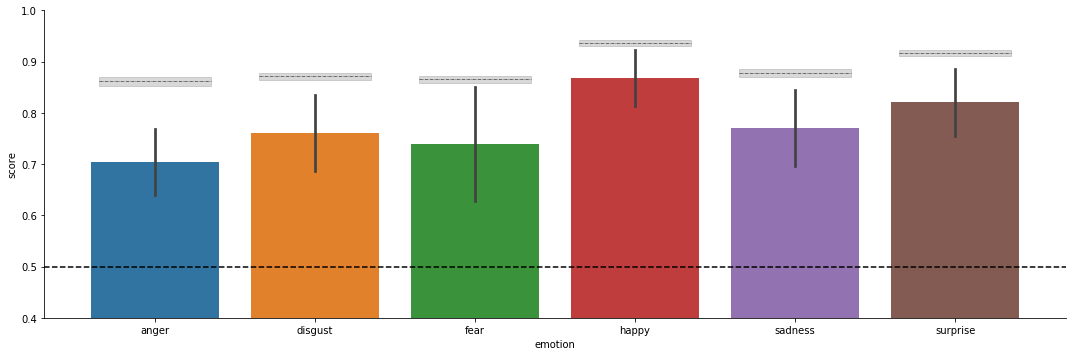

In [11]:
ml_df = pd.read_csv('../results/method-ml_analysis-between_auroc.tsv', sep='\t', index_col=0)

g = sns.catplot(x='emotion', y='score', data=ml_df,
                kind="bar", aspect=3, height=5, ci='sd')
ax = plt.gca()
ax.axhline(0.5, ls='--', c='k')
ax.set_ylim(0.4, 1.)

nc = pd.read_csv('../results/noise_ceilings_half_subjects.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity == 0")

for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]])
    this_sd = np.array([nc['sd'].iloc[i]])
    plt.plot(np.linspace(i-0.35, i+0.35, num=6), [this_nc]*6, c='k', ls='-.', lw=0.5)
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )

    

## Repeats

In [1]:
import pandas as pd
from glob import glob
import numpy as np
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
dfs = sorted(glob('../data/ratings/*.tsv'))
df = pd.concat([pd.read_csv(df, sep='\t', index_col=0).query("emotion != 'other'").loc[:, 'emotion'] for df in dfs])
df = df.loc[df.index != 'empty']
df = df.sort_index()
uniq_idx = df.index.unique()

In [ ]:
idx = df.index.tolist()
idx[-1] = 'test'
df.index = idx

In [8]:
def compute_noise_ceiling(y, only_repeats=True, n_bootstraps=0):
    """ Computes a noise ceiling given a series y with possible 
    repeated indices. """

    if only_repeats:
        # Compute noise ceiling only on repeated trials! (No bias upwards)
        repeats = y.loc[y.index.duplicated()].index.unique()
        y = y.loc[repeats]

    # Compute the "optimal" predictions:
    # 1. Per unique index, compute the count per emotion
    # 2. Divide counts by sum (per unique index)
    # 3. Unstack to move emotion groups to columns
    # 4. Fill NaNs (no ratings) with 0
    opt = (y.reset_index() \
        .groupby(['index', 'emotion']).size() \
        .groupby(level=0) \
        .apply(lambda x: x / x.sum()) \
        .unstack(level=1) \
        .fillna(0)
    )

    if n_bootstraps != 0:  # do bootstrapping
        # Pre-allocate noise ceiling array
        nc = np.zeros((n_bootstraps, opt.shape[1]))

        for i in tqdm(range(n_bootstraps)):
            # Resample optimal predictions
            opt2 = opt.copy().sample(frac=1, replace=True)
            # Remove non-used trials from y
            y2 = y.copy().loc[opt2.index].sort_index()
            # Repeat the optimal trials according to the repeats in y2
            opt_rep = opt.loc[y2.index, :].sort_index()
            # Compute noise ceiling 
            nc[i, :] = roc_auc_score(pd.get_dummies(y2).values, opt_rep.values, average=None)
    else:
        # Same as above, but on the original opt array
        opt_rep = opt.copy().loc[y.index, :].sort_index()
        nc = roc_auc_score(pd.get_dummies(y).values, opt_rep.values, average=None)

    return nc

compute_noise_ceiling(df, True, 10)

100%|██████████| 10/10 [00:03<00:00,  2.66it/s]


array([[0.82990566, 0.8396719 , 0.84203505, 0.92737847, 0.85160418,
        0.89510682],
       [0.83245915, 0.84624472, 0.84241141, 0.92708354, 0.8547657 ,
        0.89810394],
       [0.83210565, 0.84070222, 0.84240136, 0.92595054, 0.8520677 ,
        0.89550907],
       [0.83511835, 0.84851047, 0.84038686, 0.92813069, 0.85921054,
        0.90089677],
       [0.83141682, 0.84897434, 0.84187931, 0.92792008, 0.85349578,
        0.89810936],
       [0.83543474, 0.84536157, 0.8442427 , 0.92921255, 0.85553399,
        0.89851512],
       [0.82830782, 0.84638313, 0.84507255, 0.92895113, 0.85883089,
        0.89676437],
       [0.83592755, 0.84651383, 0.84273902, 0.92643165, 0.8552097 ,
        0.89860133],
       [0.83591027, 0.8430271 , 0.84492728, 0.92815966, 0.85628789,
        0.8952444 ],
       [0.83375522, 0.84304498, 0.84436459, 0.92631325, 0.85475997,
        0.89844849]])